In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
tf.__version__

'2.0.0'

### Load Data
Load MNIST data 

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Preprocess
Reshape input data from 2 dimension to one dimension in order to help our neural network model to read easily.

In [4]:
input_dim = 28*28
x_train, y_train = x_train.reshape(-1, input_dim), y_train.reshape(-1, 1)
x_test, y_test = x_test.reshape(-1, input_dim), y_test.reshape(-1, 1)


### Build Model

Create very very basic model which has one input, one output and 2 hidden layers.
The output will be array with size 10, With help of softmax function at the end of our network, output will be the index of highest value.

In [5]:
model = Sequential([
  Dense(30, activation='relu', input_shape=(784,)),
  Dense(20, activation='relu'),
  Dense(10, activation='softmax'),
])

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(
  x_train, # training data
  to_categorical(y_train), # training targets
  epochs=10,
  batch_size=32,
)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 2.0757 - accuracy: 0.3664
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 1.0735 - accuracy: 0.6085
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.8275 - accuracy: 0.6827
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.6085 - accuracy: 0.8029
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3578 - accuracy: 0.9065
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2465 - accuracy: 0.9339
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2040 - accuracy: 0.9441
Epoch 8/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1897 - accuracy: 0.9480
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1744 - accuracy: 0.9516
Epoch 10/10
60

### Evaluate
evaluate test data and print the results. Also get predicted results in order to draw graphs.


In [8]:
results = model.evaluate(x_test, to_categorical(y_test), batch_size=128, verbose = 0)
print("loss: %f, accuracy: %f" % (results[0], results[1]))
predicted = model.predict(x_test)

loss: 0.248570, accuracy: 0.939200


### Visualize
Take a sample and draw graph

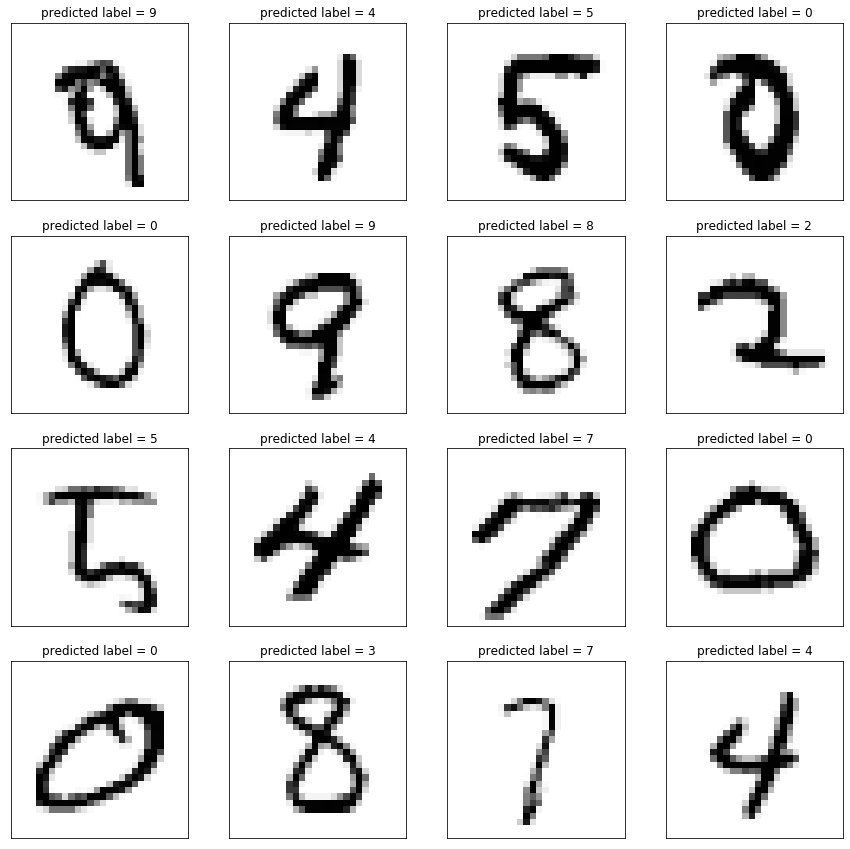

In [9]:
import random

dim1, dim2 = 4,4
pairs = list(zip(x_test, predicted)) 
pairs = random.sample(pairs, dim1*dim2)  
A1, B1 = zip(*pairs)  
fig, axs = plt.subplots(dim1, dim2, figsize=(15,15))

count = 0
for i in range(dim1):
    for j in range(dim2):
        axs[i, j].imshow(np.reshape(A1[count], [28, 28]), cmap='Greys')
        axs[i, j].xaxis.set_visible(False) 
        axs[i, j].yaxis.set_visible(False)
        axs[i, j].set_title("predicted label = %d" % np.argmax(B1[count])) 
        count += 1
        